In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
initial_investment = 50000
annual_contribution = 12000 
years = 30
simulations = 1000

avg_return = 0.11
volatility = 0.18

In [72]:
market_returns = np.random.normal(avg_return, volatility, (years, simulations))
print(market_returns.shape)

(30, 1000)


In [73]:
portfolio_paths = np.zeros((years + 1, simulations))
portfolio_paths[0] = initial_investment

In [74]:
for t in range(1, years + 1):
    portfolio_paths[t] = portfolio_paths[t-1] * (1 + market_returns[t-1]) + annual_contribution

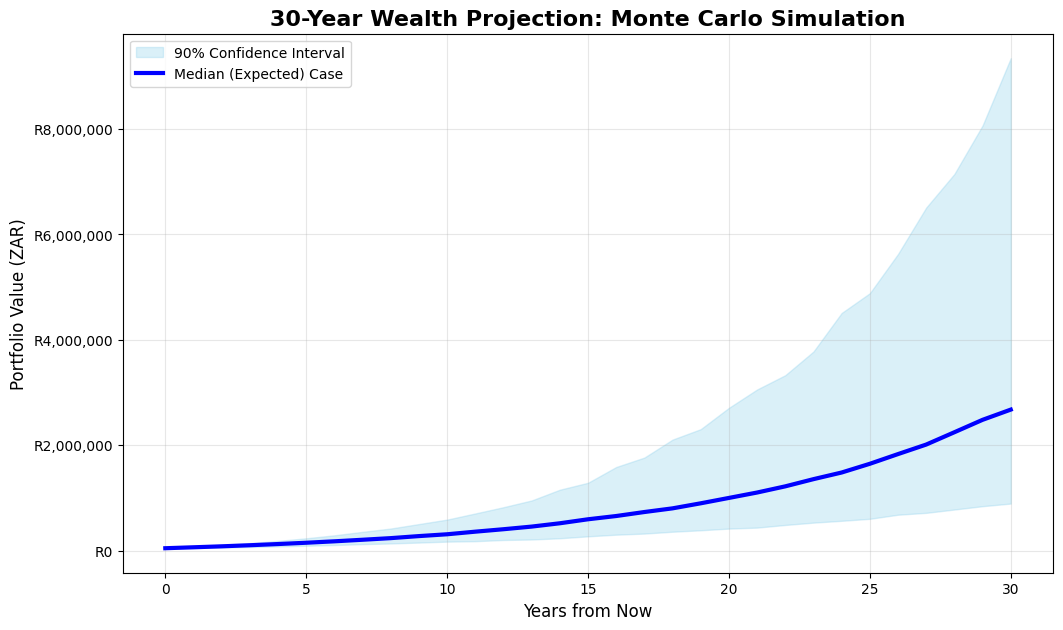

Probability of reaching R2,000,000: 66.2%


In [76]:
import matplotlib.ticker as ticker

median_path = np.percentile(portfolio_paths, 50, axis=1)
top_5_percent = np.percentile(portfolio_paths, 95, axis=1)
bottom_5_percent = np.percentile(portfolio_paths, 5, axis=1)


plt.figure(figsize=(12, 7))


plt.fill_between(range(years + 1), bottom_5_percent, top_5_percent, color='skyblue', alpha=0.3, label='90% Confidence Interval')
plt.plot(median_path, color='blue', lw=3, label='Median (Expected) Case')


def zar_format(x, pos):
    return f'R{x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(zar_format))


plt.title('30-Year Wealth Projection: Monte Carlo Simulation', fontsize=16, fontweight='bold')
plt.xlabel('Years from Now', fontsize=12)
plt.ylabel('Portfolio Value (ZAR)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.show()


goal = 2000000
ending_balances = portfolio_paths[-1]
success_rate = (ending_balances > goal).mean() * 100

print(f"Probability of reaching R{goal:,.0f}: {success_rate:.1f}%")